<a href="https://colab.research.google.com/github/ghubesharman/DataSciencePython/blob/main/Experiment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas scikit-learn seaborn

In [2]:
import pandas as pd
from sklearn.datasets import load_iris

# Load Iris dataset from sklearn
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['class'] = iris.target

# Display the first few rows of the dataset
data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


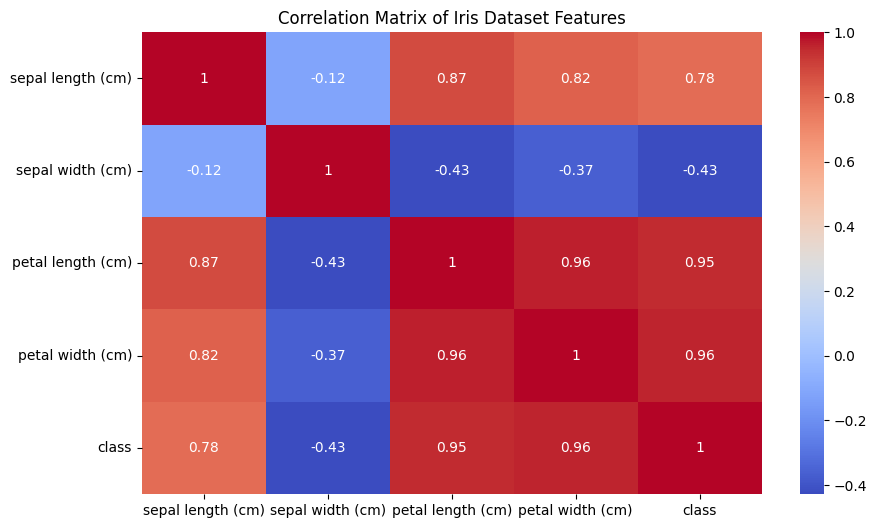

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for numeric features
correlation_matrix = data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Iris Dataset Features')
plt.show()


In [4]:
from sklearn.feature_selection import SelectKBest, f_classif

# Separate features (X) and target (y)
X = data.drop(columns='class')
y = data['class']

# Apply ANOVA F-test
selector = SelectKBest(score_func=f_classif, k='all')
X_new = selector.fit_transform(X, y)

# Get feature scores and p-values
feature_scores = selector.scores_
feature_p_values = selector.pvalues_

# Display feature scores
anova_results = pd.DataFrame({
    'Feature': iris.feature_names,
    'ANOVA F-Score': feature_scores,
    'p-value': feature_p_values
})

# Print the results
print(anova_results)


             Feature  ANOVA F-Score       p-value
0  sepal length (cm)     119.264502  1.669669e-31
1   sepal width (cm)      49.160040  4.492017e-17
2  petal length (cm)    1180.161182  2.856777e-91
3   petal width (cm)     960.007147  4.169446e-85


In [5]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

# Normalize the feature data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply Chi-Square test
chi2_scores, p_values = chi2(X_scaled, y)

# Display the results
chi2_results = pd.DataFrame({
    'Feature': iris.feature_names,
    'Chi2 Score': chi2_scores,
    'p-value': p_values
})

# Print Chi-Square test results
print(chi2_results)


             Feature  Chi2 Score       p-value
0  sepal length (cm)   11.377274  3.384203e-03
1   sepal width (cm)    4.470734  1.069529e-01
2  petal length (cm)   26.861936  1.468942e-06
3   petal width (cm)   30.478068  2.408639e-07
